Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import pickle
import requests
import os
import time
from PIL import Image
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path =  "/content/drive/MyDrive/CDC_DS_PROJECT"

In [ ]:
train_df = pd.read_csv(f'{folder_path}/train.csv')
test_df = pd.read_csv(f'{folder_path}/test.csv')

In [ ]:
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [ ]:
test_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


**Data Analysis**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [ ]:
train_df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


No missing values found

In [ ]:
train_df.duplicated().sum()

np.int64(0)

No duplicates row

In [ ]:
train_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
cat_col = ['bedrooms', 'floors', 'waterfront','view', 'condition', 'grade']
for col in cat_col:
  unique = train_df[col].nunique()
  print(f"Number of unique values in {col} are {unique}")
  print(train_df[col].value_counts(ascending = True))
  print("\n")


Number of unique values in bedrooms are 12
bedrooms
10       1
33       1
9        3
0        7
8        7
7       22
1      141
6      163
5     1010
2     2080
4     4708
3     7216
Name: count, dtype: int64


Number of unique values in floors are 6
floors
3.5       4
2.5      82
3.0     455
1.5    1354
2.0    5661
1.0    7803
Name: count, dtype: int64


Number of unique values in waterfront are 2
waterfront
1       46
0    15313
Name: count, dtype: int64


Number of unique values in view are 5
view
4      111
1      213
3      253
2      621
0    14161
Name: count, dtype: int64


Number of unique values in condition are 5
condition
1      24
2     129
5    1179
4    4048
3    9979
Name: count, dtype: int64


Number of unique values in grade are 11
grade
1        1
3        3
12       4
4       24
11     104
5      183
10     575
6     1511
9     1728
8     4476
7     6750
Name: count, dtype: int64




<Axes: xlabel='price', ylabel='Count'>

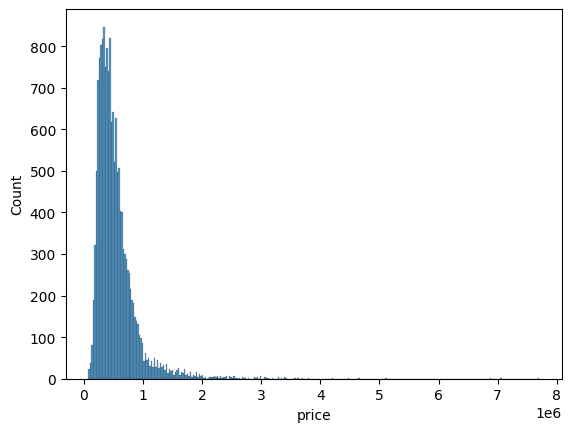

In [ ]:
sns.histplot(train_df['price'])

More house are of lower prices -> skewed

<Axes: ylabel='price'>

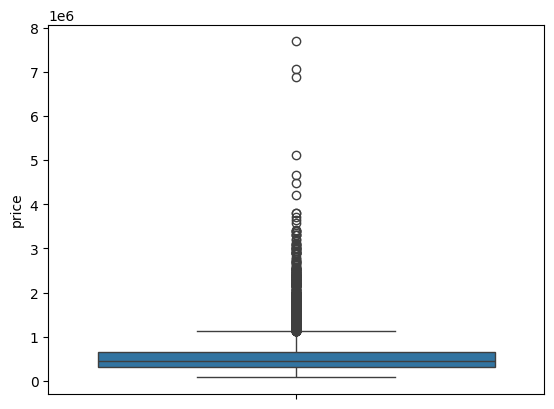

In [ ]:
sns.boxplot(train_df['price'])

few outliers are present

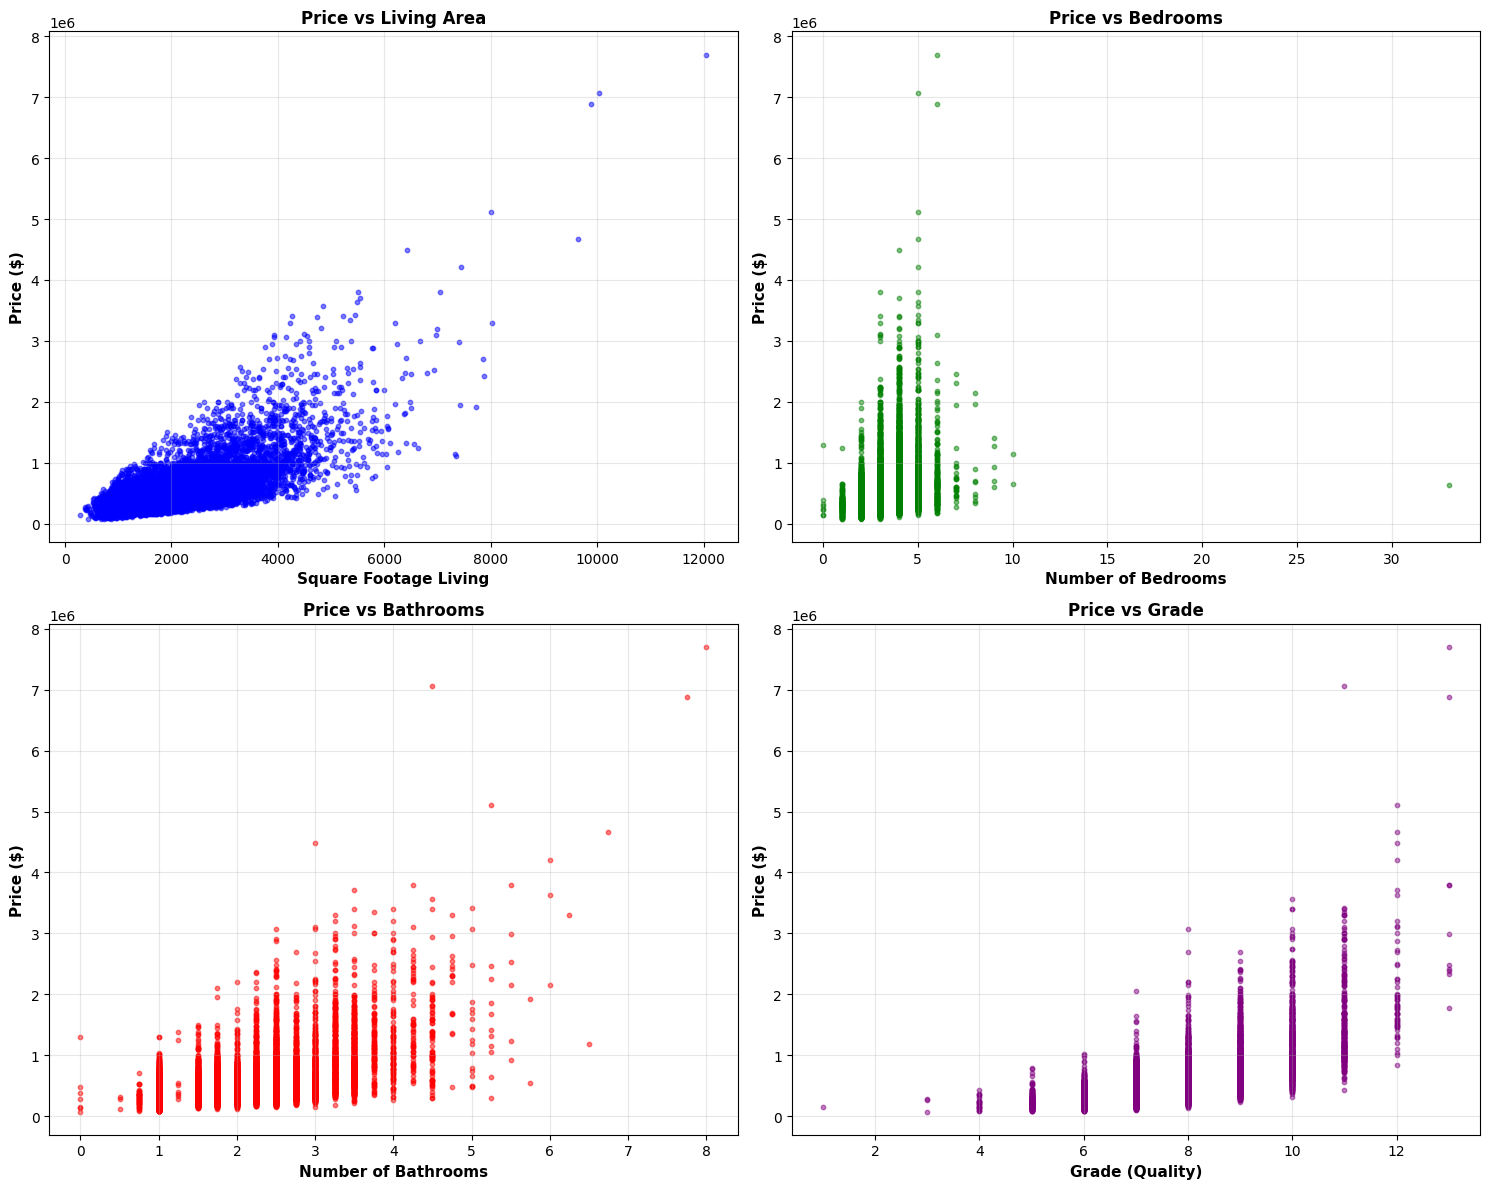

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

plots = [
    (0, 0, 'sqft_living', 'Square Footage Living', 'Price vs Living Area', 'blue'),
    (0, 1, 'bedrooms', 'Number of Bedrooms', 'Price vs Bedrooms', 'green'),
    (1, 0, 'bathrooms', 'Number of Bathrooms', 'Price vs Bathrooms', 'red'),
    (1, 1, 'grade', 'Grade (Quality)', 'Price vs Grade', 'purple')
]

for row, col, x_col, x_label, title, color in plots:
    axes[row, col].scatter(
        train_df[x_col],
        train_df['price'],
        alpha=0.5,
        color=color,
        s=10
    )
    axes[row, col].set_xlabel(x_label, fontsize=11, fontweight='bold')
    axes[row, col].set_ylabel('Price ($)', fontsize=11, fontweight='bold')
    axes[row, col].set_title(title, fontsize=12, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


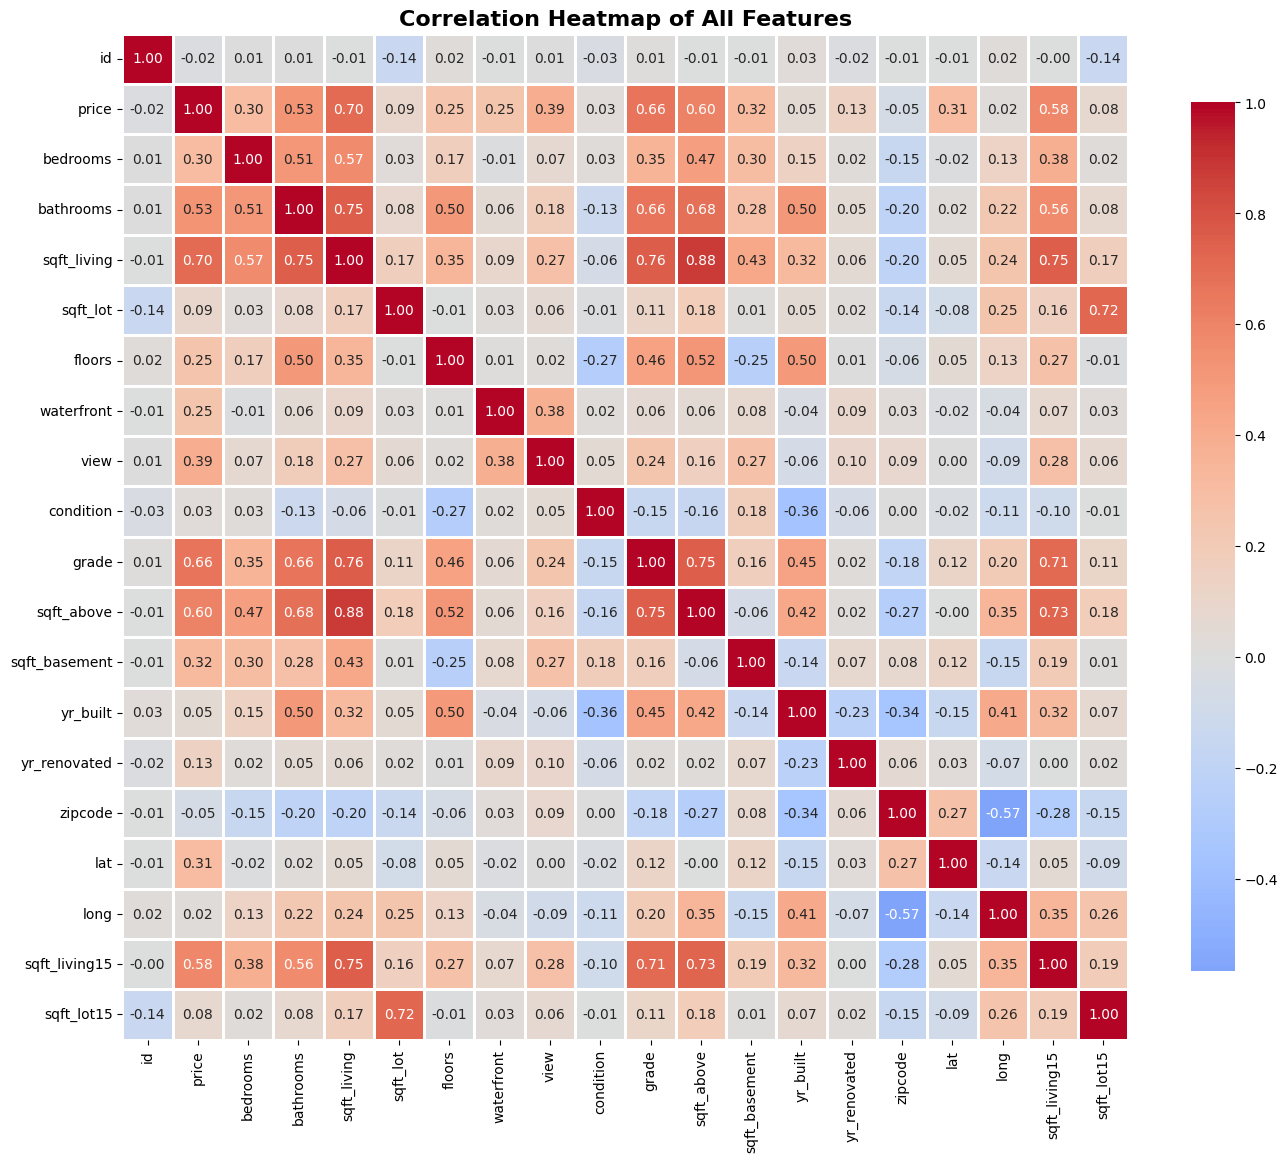

In [ ]:
numerical_cols = train_df.select_dtypes(include=[np.number]).columns
corr_matrix = train_df[numerical_cols].corr()
plt.figure(figsize=(14, 12))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    'Correlation Heatmap of All Features',
    fontsize=16,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


In [ ]:
price_corr = corr_matrix['price'].sort_values(ascending=False)
print("TOP FEATURES CORRELATED WITH PRICE")
print(price_corr.to_string())


TOP FEATURES CORRELATED WITH PRICE
price            1.000000
sqft_living      0.700933
grade            0.664266
sqft_above       0.602648
sqft_living15    0.581781
bathrooms        0.525487
view             0.390534
sqft_basement    0.320301
lat              0.310008
bedrooms         0.304454
floors           0.251428
waterfront       0.245221
yr_renovated     0.133075
sqft_lot         0.088526
sqft_lot15       0.076060
yr_built         0.048307
condition        0.031333
long             0.024279
id              -0.020260
zipcode         -0.054517


**DATA PREPARATION AND CLEANING**

In [ ]:
clean_data=train_df.copy()
# removing duplicates
# removing outliers

In [ ]:
Q1 = clean_data['price'].quantile(0.25)
Q3 = clean_data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
clean_data = clean_data[(clean_data['price'] >= lower_bound) & (clean_data['price'] <= upper_bound)]

clean_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [ ]:
#removing duplicates
if(clean_data['id'].duplicated().sum()>0):
  clean_data = clean_data.drop_duplicates(subset=['id'], keep='first')

feature engineering

In [ ]:
clean_data['total_rooms'] = clean_data['bedrooms'] + clean_data['bathrooms']
clean_data['living_vs_neighbors'] = clean_data['sqft_living'] / (clean_data['sqft_living15'])
print('New features are created')

New features are created


In [ ]:
#saving clean data
clean_data.to_csv(f'{folder_path}/clean_train.csv', index=False)

SATELLITE DATA PROCESSING

In [ ]:
# Loading Mapbox API token from Colab Secrets
from google.colab import userdata
try:
    MAPBOX_API_TOKEN = userdata.get('MAPBOX_TOKEN')
    print("API TOKEN LOADED SUCCESSFULLY")
    print(f"Token length: {len(MAPBOX_API_TOKEN)} characters")
    print(f"Token preview: {MAPBOX_API_TOKEN[:15]}...{MAPBOX_API_TOKEN[-10:]}")

except Exception as e:

    print("ERROR: Could not load API token from Colab Secrets")
    print("Please add your Mapbox token to Colab Secrets:")
    print("1. Click the key icon in the left sidebar")
    print("2. Add new secret: Name='MAPBOX_TOKEN', Value='your_token_here'")
    print(f"Error details: {str(e)}")

API TOKEN LOADED SUCCESSFULLY
Token length: 92 characters
Token preview: pk.eyJ1IjoiYW5r...hyVYvC0JDg


In [ ]:
# Adding current directory to Python path
import sys
sys.path.insert(0, '/content')

# Importing the MapboxImageCollector class
from data_fetcher import MapboxImageCollector

# Initializing the collector
collector = MapboxImageCollector(
    token_key=MAPBOX_API_TOKEN,
    dimension='256x256',
    zoom_value=18
)

print("Image collector initialized successfully")


Mapbox Image Collector initialized
Settings -> Size: 256x256, Zoom: 18
Image collector initialized successfully


Downloading Train images

In [ ]:
batch_size = 1000
total_properties = len(clean_data)
total_batches = (total_properties + batch_size - 1) // batch_size

This code handles batch-wise downloading of property images while tracking progress, successes, and failures. For each batch, it calculates the start and end indices, loops over each property, and checks if the corresponding image already exists. If not, it uses a collector.fetch_image() function to download the image from latitude and longitude coordinates, incrementing success or failure counters accordingly. It also adds a short sleep to avoid API rate limits. Throughout each batch, the code displays a dynamic progress bar every 20 images using clear_output() in Jupyter/Colab. After finishing a batch, it prints a summary of successful downloads, allowing efficient, monitored, and resumable batch processing of large image datasets.

In [ ]:
import time
import os
from IPython.display import clear_output

# Dictionary to track batch downloads
download_tracker = {
    'batch_no': [],
    'start_idx': [],
    'end_idx': [],
    'success_count': [],
    'failure_count': [],
    'elapsed_sec': []
}

for batch_idx in range(1, total_batches + 1):

    # Determine indices for this batch
    batch_start = (batch_idx - 1) * batch_size
    batch_end = min(batch_start + batch_size, total_properties)

    # Subset of the dataframe for current batch
    batch_subset = clean_data.iloc[batch_start:batch_end]

    print(f" PROCESSING BATCH {batch_idx}/{total_batches} | Images {batch_start+1} to {batch_end}")

    # Initialize batch timers and counters
    start_time = time.time()
    success_counter = 0
    fail_counter = 0

    # Download images one by one
    for counter, (_, row) in enumerate(batch_subset.iterrows(), start=1):

        prop_id = row['id']
        lat_val = row['lat']
        lon_val = row['long']

        image_file = os.path.join(f'{folder_path}/TRAIN_IMAGES', f"property_{prop_id}.jpg")

        if os.path.exists(image_file):
            success_counter += 1
        else:
            # Download using new collector
            result = collector.fetch_image(
                lat_value=lat_val,
                lon_value=lon_val,
                record_id=prop_id,
                output_file=image_file
            )

            if result:
                success_counter += 1
            else:
                fail_counter += 1

            # Sleep to avoid hitting API limits
            time.sleep(0.2)

        # Display progress every 20 images
        if counter % 20 == 0 or counter == len(batch_subset):
            pct_complete = (counter / len(batch_subset)) * 100
            bar_length = 40
            filled = int(bar_length * counter / len(batch_subset))
            bar_display = '█' * filled + '░' * (bar_length - filled)

            clear_output(wait=True)
            print(f" Batch {batch_idx}/{total_batches} Progress")
            print(f"{counter}/{len(batch_subset)} images processed")
            print(f"Progress: [{bar_display}] {pct_complete:.1f}%")
            print(f"Success: {success_counter} | Failed: {fail_counter}")


    print(f"\nBatch {batch_idx} finished!")
    print(f" Successful downloads: {success_counter}/{len(batch_subset)}")




 Batch 16/16 Progress
265/265 images processed
Progress: [████████████████████████████████████████] 100.0%
Success: 265 | Failed: 0

Batch 16 finished!
 Successful downloads: 265/265


The collector.build_image_index() function looks at your clean_data dataframe and the folder containing the downloaded images (TRAIN_IMAGES). It generates a CSV file (train_image_mapping.csv) that links each property ID in the dataset to its corresponding image file, ensuring you know which image belongs to which record.

In [ ]:
train_mapping = collector.build_image_index(
    source_frame=clean_data,
    image_dir= f'{folder_path}/TRAIN_IMAGES',
    csv_output=f'{folder_path}/train_image_mapping.csv'
)

train_mapping.head(10)

Generating image index file...
Images present: 15265/15265
Index saved at: /content/drive/MyDrive/CDC_DS_PROJECT/train_image_mapping.csv


,id,lat,long,file_location,file_available
0,9117000170,47.4362,-122.187,/content/drive/MyDrive/CDC_DS_PROJECT/TRAIN_IM...,True
1,6700390210,47.4034,-122.187,/content/drive/MyDrive/CDC_DS_PROJECT/TRAIN_IM...,True
2,7212660540,47.2704,-122.313,/content/drive/MyDrive/CDC_DS_PROJECT/TRAIN_IM...,True
3,8562780200,47.5321,-122.073,/content/drive/MyDrive/CDC_DS_PROJECT/TRAIN_IM...,True
4,7760400350,47.3715,-122.074,/content/drive/MyDrive/CDC_DS_PROJECT/TRAIN_IM...,True
5,464001025,47.6948,-122.395,/content/drive/MyDrive/CDC_DS_PROJECT/TRAIN_IM...,True
6,3432500486,47.7463,-122.315,/content/drive/MyDrive/CDC_DS_PROJECT/TRAIN_IM...,True
7,1126059095,47.7489,-122.123,/content/drive/MyDrive/CDC_DS_PROJECT/TRAIN_IM...,True
8,3876500290,47.3377,-122.291,/content/drive/MyDrive/CDC_DS_PROJECT/TRAIN_IM...,True
9,1865400075,47.6983,-122.367,/content/drive/MyDrive/CDC_DS_PROJECT/TRAIN_IM...,True


Processing test images and data

In [ ]:
test_df.shape

(5404, 20)

In [ ]:
test_df.isnull().sum()

,0
id,0
date,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
test_df.duplicated().sum()

np.int64(0)

In [ ]:
test_df['total_rooms'] = test_df['bedrooms'] + test_df['bathrooms']
test_df['living_vs_neighbors'] = test_df['sqft_living'] / test_df['sqft_living15']
print("New features are created")

New features are created


In [ ]:
test_df.to_csv(f'{folder_path}/test_data.csv')

In [ ]:
batch_size = 1000
total_properties = len(test_df)
total_batches = (total_properties + batch_size - 1) // batch_size

In [ ]:
total_properties

5404

In [ ]:
import time
import os
from IPython.display import clear_output

# Dictionary to track batch downloads
download_tracker = {
    'batch_no': [],
    'start_idx': [],
    'end_idx': [],
    'success_count': [],
    'failure_count': [],
    'elapsed_sec': []
}

for batch_idx in range(1, total_batches + 1):

    # Determine indices for this batch
    batch_start = (batch_idx - 1) * batch_size
    batch_end = min(batch_start + batch_size, total_properties)

    # Subset of the dataframe for current batch
    batch_subset = test_df.iloc[batch_start:batch_end]

    print(f" PROCESSING BATCH {batch_idx}/{total_batches} | Images {batch_start+1} to {batch_end}")

    # Initialize batch timers and counters
    start_time = time.time()
    success_counter = 0
    fail_counter = 0

    # Download images one by one
    for counter, (_, row) in enumerate(batch_subset.iterrows(), start=1):

        prop_id = row['id']
        lat_val = row['lat']
        lon_val = row['long']

        image_file = os.path.join(f'{folder_path}/TEST_IMAGES2', f"property_{prop_id}.jpg")

        if os.path.exists(image_file):
            success_counter += 1
        else:
            # Download using new collector
            result = collector.fetch_image(
                lat_value=lat_val,
                lon_value=lon_val,
                record_id=prop_id,
                output_file=image_file
            )

            if result:
                success_counter += 1
            else:
                fail_counter += 1

            # Sleep to avoid hitting API limits
            time.sleep(0.2)

        # Display progress every 20 images
        if counter % 20 == 0 or counter == len(batch_subset):
            pct_complete = (counter / len(batch_subset)) * 100
            bar_length = 40
            filled = int(bar_length * counter / len(batch_subset))
            bar_display = '█' * filled + '░' * (bar_length - filled)

            clear_output(wait=True)
            print(f" Batch {batch_idx}/{total_batches} Progress")
            print(f"{counter}/{len(batch_subset)} images processed")
            print(f"Progress: [{bar_display}] {pct_complete:.1f}%")
            print(f"Success: {success_counter} | Failed: {fail_counter}")


    print(f"\nBatch {batch_idx} finished!")
    print(f" Successful downloads: {success_counter}/{len(batch_subset)}")

 Batch 6/6 Progress
404/404 images processed
Progress: [████████████████████████████████████████] 100.0%
Success: 404 | Failed: 0

Batch 6 finished!
 Successful downloads: 404/404


In [ ]:
train_mapping = collector.build_image_index(
    source_frame=test_df,
    image_dir= f'{folder_path}/TEST_IMAGES2',
    csv_output=f'{folder_path}/test_image_mapping2.csv'
)

Generating image index file...
Images present: 5404/5404
Index saved at: /content/drive/MyDrive/CDC_DS_PROJECT/test_image_mapping2.csv


Scaling the columns of tabular data

In [ ]:
cols_to_scale = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clean_data[cols_to_scale] = scaler.fit_transform(clean_data[cols_to_scale])
clean_data.head()
print('Columns are scaled')

Columns are scaled


In [ ]:
test_df[cols_to_scale]=scaler.transform(test_df[cols_to_scale])
test_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms,living_vs_neighbors
0,2591820310,20141006T000000,4,2.25,-0.031285,-0.143311,2.0,0,0,4,...,-0.661583,1986,0,98058,47.4388,-122.162,0.565303,-0.182019,6.25,0.866109
1,7974200820,20140821T000000,5,3.00,0.840906,-0.188031,1.0,0,0,5,...,1.694343,1977,0,98115,47.6784,-122.285,0.536552,-0.231935,8.00,1.223629
2,7701450110,20140815T000000,4,2.50,1.755129,-0.101962,2.0,0,2,3,...,-0.661583,1997,0,98006,47.5646,-122.129,2.462828,-0.112094,6.50,1.016173
3,9522300010,20150331T000000,3,3.50,2.585286,-0.025155,2.0,0,2,3,...,-0.661583,1990,0,98034,47.6995,-122.228,2.951585,0.047870,6.50,1.125926
4,9510861140,20140714T000000,3,2.50,0.473114,-0.216024,2.0,0,0,3,...,-0.661583,2004,0,98052,47.6647,-122.083,0.364050,-0.310596,5.50,1.133333


In [ ]:
#saving processed data
test_df.to_csv(f'{folder_path}/fully_processed_test_data.csv')
clean_data.to_csv(f'{folder_path}/fully_processed_train_data.csv')